### Preprocessing

In [ ]:
import pandas as pd
import numpy as np

reviews = pd.read_csv("IMDB Dataset.csv")       # Load IMDB dataset (50,000 movie reviews with sentiment labels)

In [2]:
import re
def remove_tags(text):
    p = re.compile(r'<.*/?>')
    return p.sub(r'',text)

In [ ]:
reviews['review'] = reviews['review'].apply(remove_tags)        # Remove HTML tags

In [ ]:
import string 
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [ ]:
reviews['review'] = reviews['review'].apply(remove_punc)    # Remove punctuation from reviews

In [ ]:
reviews['review'] = reviews['review'].apply(lambda x:x.lower())     # Convert reviews to lowercase

In [7]:
reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
reviews.duplicated().sum()

452

In [9]:
reviews = reviews.drop_duplicates(keep='first')

In [10]:
reviews['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mei would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side'

### Text Normalization

In [22]:
import nltk

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [23]:
def stem(text):
    y = [ps.stem(i) for i in text.split()]
    return " ".join(y)

In [24]:
reviews['review'] = reviews['review'].apply(stem)

### Vectorization and Model 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=18000,ngram_range=(1,2))  # Vectorize text using TF-IDF with unigrams and bigrams

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Prepare data
x = reviews['review']
y = reviews['sentiment']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)  # Encode: negative=0, positive=1


In [ ]:
# Split data into 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [ 1.8, 1.9, 2.0, 2.1, 2.2]}


In [ ]:
#Text Vectorization

x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [30]:
#Train the logistic regression model

model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_vec, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1.8, 1.9, 2.0, 2.1, 2.2]}, scoring='accuracy')

In [31]:
#Prediction and Evaluation 
from sklearn.metrics import accuracy_score,classification_report

In [32]:
print(f"Best C: {grid.best_params_['C']}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")
y_pred = grid.predict(x_test_vec)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))

Best C: 1.9
Best Cross-Validation Accuracy: 0.8660
Test Accuracy: 0.8742

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4963
           1       0.87      0.89      0.88      4947

    accuracy                           0.87      9910
   macro avg       0.87      0.87      0.87      9910
weighted avg       0.87      0.87      0.87      9910



### Just some test Results

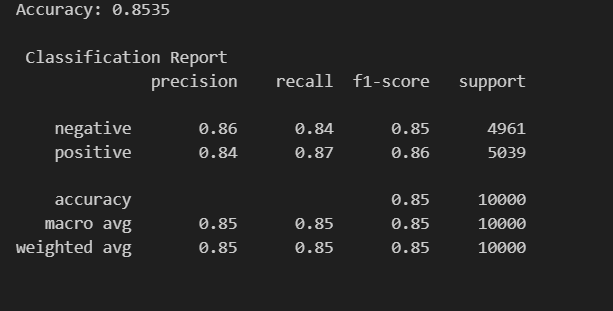  Before N_grams Logistic Regression



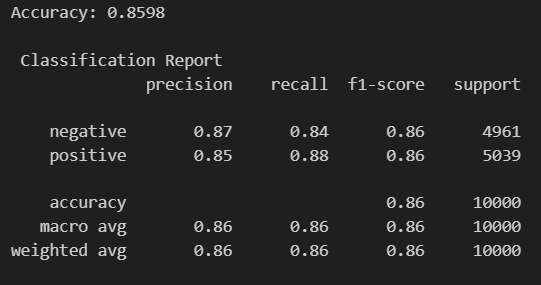  AFter N_grams Logistic Regression

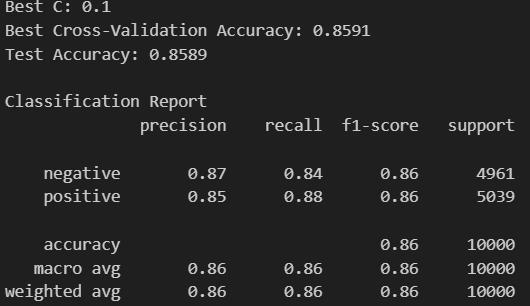  With LinearSVC C 0.1


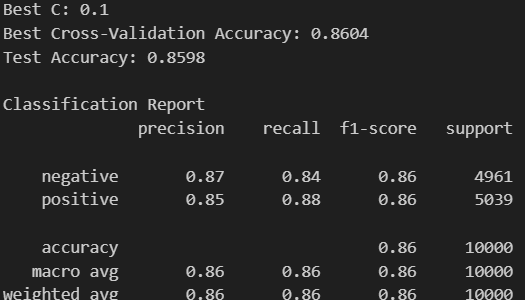 With LinearSVC C 0.1 Max_features = 18000

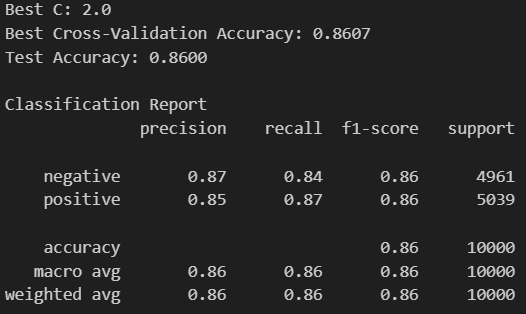 with LogisticRegression

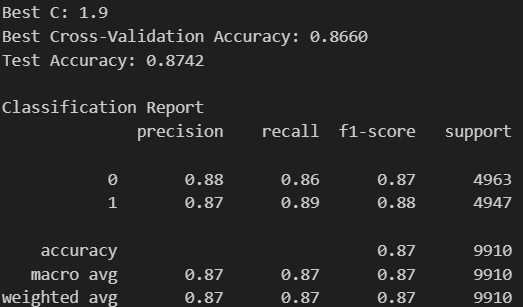 With Logistic Regression Max_Features = 18000 N_gram(1,2) C = 1.9